Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 543625.8750 - val_loss: 307918.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 543598.1250 - val_loss: 307916.9688
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 543594.1250 - val_loss: 307919.4375
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 543608.1250 - val_loss: 307901.0625
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 543607.2500 - val_loss: 307775.3750
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 543547.6250 - val_loss: 307774.9062
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 543543.3750 - val_loss: 307775.6250
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 543518.8125 - val_loss: 307776.0625
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 543516.1250 - val_loss: 307775.9062
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 543514.3125 - val_loss: 307772.7188
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 543

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: in

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 742ms/step - accuracy: 0.4479 - loss: 0.9500 - val_accuracy: 0.8824 - val_loss: 0.6601 - learning_rate: 0.0010
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6979 - loss: 0.9015 - val_accuracy: 0.8824 - val_loss: 0.6181 - learning_rate: 0.0010
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.7292 - loss: 0.8741 - val_accuracy: 0.8824 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7188 - loss: 0.8364 - val_accuracy: 0.8824 - val_loss: 0.5422 - learning_rate: 0.0010
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7292 - loss: 0.8049 - val_accuracy: 0.8824 - val_loss: 0.5067 - learning_rate: 0.0010
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6875 - loss: 0.7835 - val_accuracy: 0.8824 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7500 - loss: 0.7313 - val_accuracy: 0.882

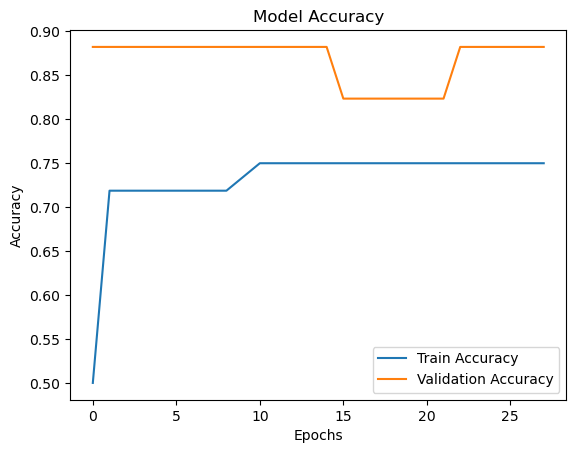

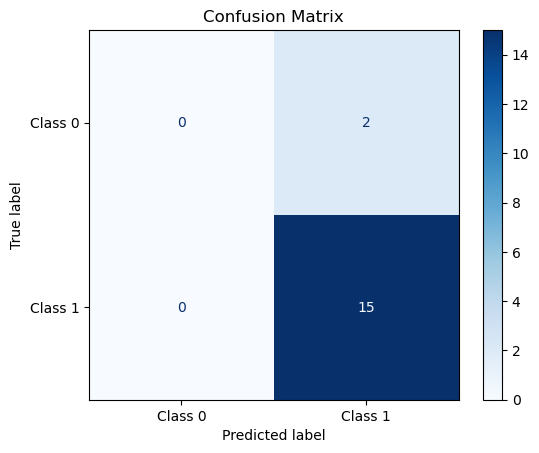

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Step 1: Load the CSV data
data = pd.read_csv("data.csv")  # Replace 'data.csv' with your actual file name

# Step 2: Preprocess the data
feature_columns = [col for col in data.columns if col not in ["Class", "UID", "Trial", "TrialSeq"]]
X = data[feature_columns]  # Exclude non-feature columns
y = data["Class"]

# Encode the target label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define the Autoencoder structure for feature extraction
input_dim = X.shape[1]  # Number of features in the dataset (31)

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(12, activation='relu')(encoded)  # Bottleneck layer with 12 neurons (compressed features)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)  # Reconstruct input

# Compile and train autoencoder
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Extract encoder part for feature extraction
encoder = Model(input_layer, encoded)

# Transform data using the trained encoder to get the 12 most important features
X_encoded = encoder.predict(X)

# Step 3: Select top 12 features based on correlation with original features
correlations = []
for i in range(12):
    corr = np.corrcoef(X_encoded[:, i], X.T)[0, 1:]  # Correlation of encoded feature with each original feature
    correlations.append(corr)

correlations = np.array(correlations).T
top_features_indices = np.argsort(np.abs(correlations).sum(axis=1))[-12:]

# Step 4: Create a DataFrame for the top 12 selected features
selected_features = X.iloc[:, top_features_indices]  # Select columns based on indices

# Step 5: Add the target variable ('Class') to the selected features DataFrame
selected_features['Class'] = y

# Step 6: Save the selected features to a new CSV file
selected_features.to_csv("extracted_features_auto.csv", index=False)

print("Extracted features saved to 'extracted_features_auto.csv'")

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 8: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input to match Conv1D's expected input (adding an extra dimension)
X_train = np.expand_dims(X_train, axis=2)  # Reshape to (batch_size, num_features, 1)
X_test = np.expand_dims(X_test, axis=2)    # Reshape to (batch_size, num_features, 1)

# Step 9: Build the Deep Learning Model with CNN for Feature Learning and Dense Layers for Classification

class DeepCNNModel(tf.keras.Model):
    def __init__(self):
        super(DeepCNNModel, self).__init__()
        self.conv1 = layers.Conv1D(64, 3, activation='relu', padding='same')
        self.pool1 = layers.MaxPooling1D(pool_size=2)
        self.conv2 = layers.Conv1D(128, 3, activation='relu', padding='same')
        self.pool2 = layers.MaxPooling1D(pool_size=2)

        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.3)
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(inputs)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        return self.output_layer(x)

# Initialize the model
model = DeepCNNModel()

# Step 10: Compile the model with class weights
class_weights = {0: 1.0, 1: 1.5}  # Adjust class weights if needed for imbalanced classes
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Step 11: Train the model with early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping, lr_scheduler], 
                    class_weight=class_weights)

# Step 12: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 13: Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 14: Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Step 15: Visualize training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 16: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 17: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


C:\Users\Lahari\AppData\Local\Temp\ipykernel_16392\3213927414.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["Class"] = y  # Add target class
C:\Users\Lahari\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Extracted features saved to 'extracted_features_som.csv'
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5833 - loss: 0.6920 - val_accuracy: 0.8235 - val_loss: 0.6887
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.6875 - loss: 0.6902 - val_accuracy: 0.8235 - val_loss: 0.6853
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7292 - loss: 0.6879 - val_accuracy: 0.8235 - val_loss: 0.6819
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7083 - loss: 0.6869 - val_accuracy: 0.8824 - val_loss: 0.6786
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6979 - loss: 0.6842 - val_accuracy: 0.8824 - val_loss: 0.6752
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7292 - loss: 0.6810 - val_accuracy: 0.8824 - val_loss: 0.6719
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7188 - loss: 0.6797 - val_accuracy: 0.8824 - val_loss: 0.6686
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.

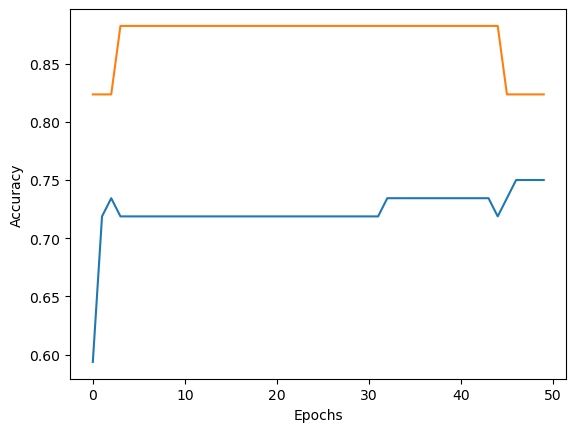

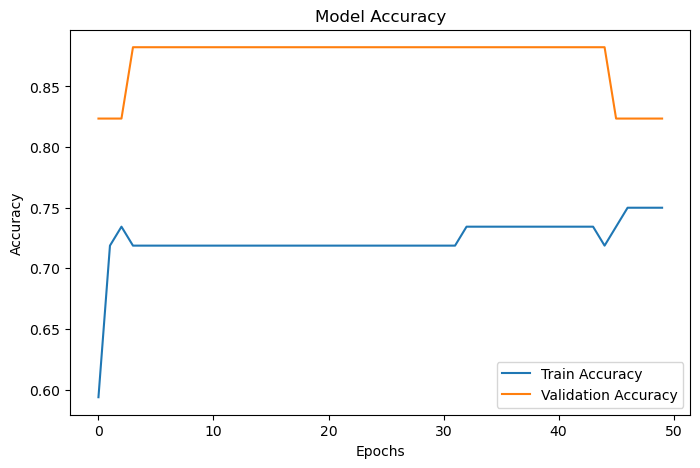

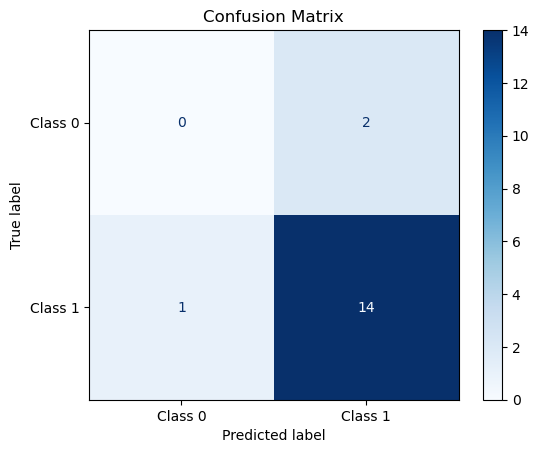

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from minisom import MiniSom  # Self-Organizing Maps library
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("data.csv")  # Replace with your actual CSV file

# Select feature columns (excluding non-feature identifiers)
feature_columns = [col for col in data.columns if col not in ["Class", "UID", "Trial", "TrialSeq"]]
X = data[feature_columns]
y = data["Class"]

# Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Define and train SOM
som_grid_size = 4  # SOM grid size (adjustable based on dataset size)
som = MiniSom(som_grid_size, som_grid_size, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)  # Train SOM with 1000 iterations

# Get SOM feature mappings
mapped_features = np.array([som.winner(x) for x in X_scaled])
mapped_features = mapped_features[:, 0] * som_grid_size + mapped_features[:, 1]  # Convert to 1D features

# Reduce to 12 features using clustering (take the first 12 most occurring feature clusters)
top_12_features = np.argsort(np.bincount(mapped_features))[-12:]

# Create DataFrame with selected features
selected_features = X.iloc[:, top_12_features]
selected_features["Class"] = y  # Add target class

# Save extracted features to a new CSV
selected_features.to_csv("extracted_features_som.csv", index=False)
print("Extracted features saved to 'extracted_features_som.csv'")
# Load new extracted feature dataset
df = pd.read_csv("extracted_features_som.csv")

# Split features and target
X_new = df.drop(columns=["Class"]).values
y_new = df["Class"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Standardize the new feature set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (batch_size, timesteps, features)
X_train = np.expand_dims(X_train, axis=1)  # Reshape to (batch_size, timesteps=1, features)
X_test = np.expand_dims(X_test, axis=1)
# Define LSTM model
model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    layers.LSTM(32),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary classification
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plot Training Results
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary values

# Compute Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot Training Results
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 16: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 17: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()




C:\Users\Lahari\AppData\Local\Temp\ipykernel_16392\1853570565.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["Class"] = y  # Add target class
C:\Users\Lahari\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Extracted features saved to 'extracted_features_pca.csv'
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 689ms/step - accuracy: 0.2604 - loss: 0.8164 - val_accuracy: 0.1176 - val_loss: 0.8511
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.2917 - loss: 0.7749 - val_accuracy: 0.2353 - val_loss: 0.8077
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3438 - loss: 0.7572 - val_accuracy: 0.2353 - val_loss: 0.7711
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4167 - loss: 0.7189 - val_accuracy: 0.3529 - val_loss: 0.7411
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.4896 - loss: 0.6997 - val_accuracy: 0.4118 - val_loss: 0.7150
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5312 - loss: 0.6932 - val_accuracy: 0.4706 - val_loss: 0.6932
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5938 - loss: 0.6753 - val_accuracy: 0.4706 - val_loss: 0.6751
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy:

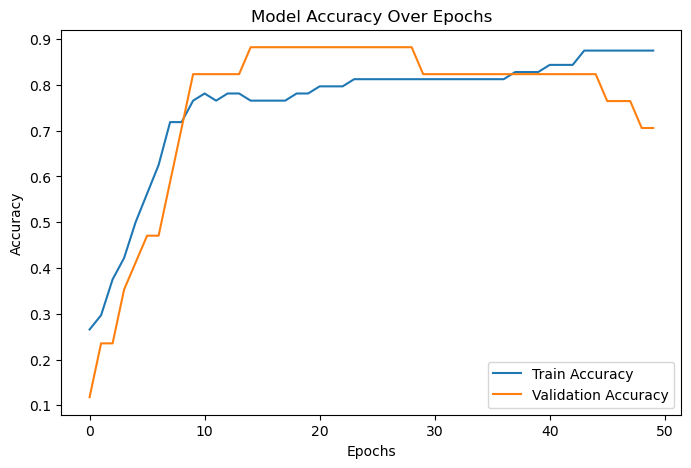

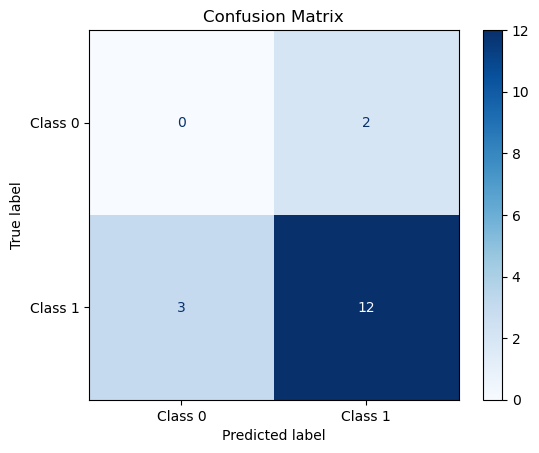

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("data.csv")  # Replace with your actual CSV file

# Select feature columns (excluding non-feature identifiers)
feature_columns = [col for col in data.columns if col not in ["Class", "UID", "Trial", "TrialSeq"]]
X = data[feature_columns]
y = data["Class"]

# Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions
pca = PCA(n_components=len(feature_columns))  # Apply PCA on all features initially
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the indices of the top 12 components based on explained variance
top_12_indices = np.argsort(explained_variance_ratio)[::-1][:12]

# Get the loadings (coefficients) for each feature in each principal component
loadings = pca.components_

# Map the most important features to the top 12 components
top_12_features = []
for idx in top_12_indices:
    # Get the feature names with the highest absolute loadings for this component
    sorted_feature_indices = np.argsort(np.abs(loadings[idx]))[::-1]
    top_feature_names = [feature_columns[i] for i in sorted_feature_indices[:1]]  # Select the most influential feature
    top_12_features.extend(top_feature_names)

# Create DataFrame with selected PCA features using original feature names
selected_features = X[top_12_features]  # Select columns based on feature names
selected_features["Class"] = y  # Add target class

# Save extracted features to a new CSV
selected_features.to_csv("extracted_features_pca.csv", index=False)
print("Extracted features saved to 'extracted_features_pca.csv'")

# Load new extracted feature dataset
df = pd.read_csv("extracted_features_pca.csv")

# Split features and target
X_new = df.drop(columns=["Class"]).values
y_new = df["Class"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Standardize the new feature set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary classification
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary values

# Compute Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot Training Results
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 16: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 17: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



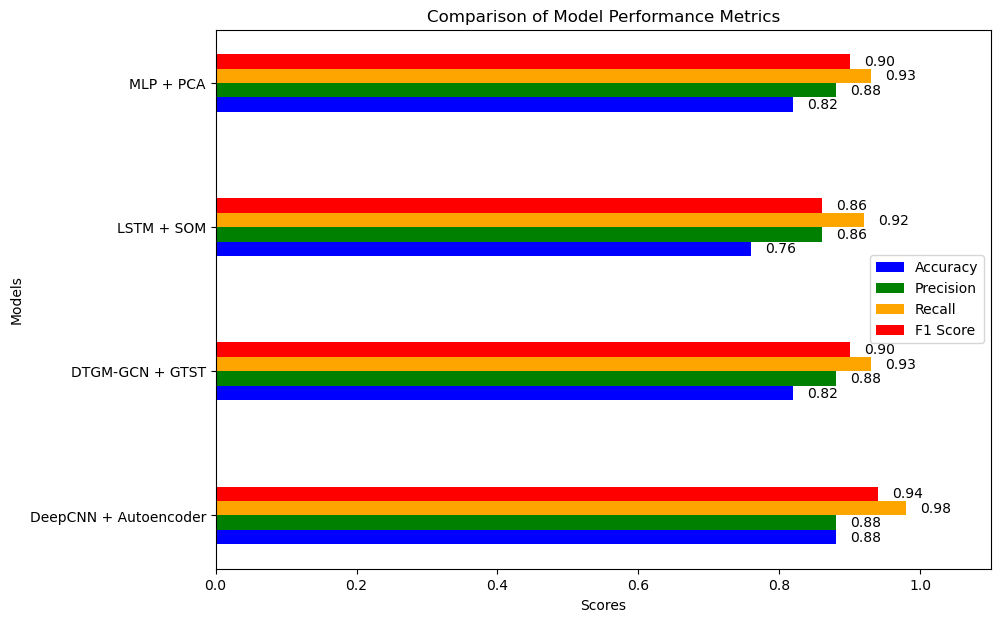

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["DeepCNN + Autoencoder", "DTGM-GCN + GTST", "LSTM + SOM", "MLP + PCA"]

# Metrics values
accuracy = [0.88, 0.82, 0.76, 0.82]
precision = [0.88, 0.88, 0.86, 0.88]
recall = [0.98, 0.93, 0.92, 0.93]
f1_score = [0.94, 0.90, 0.86, 0.90]

# Bar width
bar_height = 0.1
y = np.arange(len(models))  # y-axis positions for the models

# Create a horizontal bar chart
plt.figure(figsize=(10, 7))
plt.barh(y - 1.5 * bar_height, accuracy, height=bar_height, label="Accuracy", color="blue")
plt.barh(y - 0.5 * bar_height, precision, height=bar_height, label="Precision", color="green")
plt.barh(y + 0.5 * bar_height, recall, height=bar_height, label="Recall", color="orange")
plt.barh(y + 1.5 * bar_height, f1_score, height=bar_height, label="F1 Score", color="red")

# Labels and Title
plt.ylabel("Models")
plt.xlabel("Scores")
plt.title("Comparison of Model Performance Metrics")
plt.yticks(y, models)  # Set y-axis labels
plt.legend()  # Show legend
plt.xlim(0, 1.1)  # Set x-axis limit

# Show values inside bars
for i in range(len(models)):
    plt.text(accuracy[i] + 0.02, y[i] - 1.5 * bar_height, f"{accuracy[i]:.2f}", va='center', fontsize=10)
    plt.text(precision[i] + 0.02, y[i] - 0.5 * bar_height, f"{precision[i]:.2f}", va='center', fontsize=10)
    plt.text(recall[i] + 0.02, y[i] + 0.5 * bar_height, f"{recall[i]:.2f}", va='center', fontsize=10)
    plt.text(f1_score[i] + 0.02, y[i] + 1.5 * bar_height, f"{f1_score[i]:.2f}", va='center', fontsize=10)

# Display the graph
plt.show()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 563075.9375 - val_loss: 32326.1660
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step - loss: 563069.8750 - val_loss: 32326.1289
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 563054.6875 - val_loss: 32325.7793
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 563051.7500 - val_loss: 32324.9785
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 563046.2500 - val_loss: 32322.8340
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 563032.1875 - val_loss: 32320.7090
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 563014.0000 - val_loss: 32315.9883
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 562992.5000 - val_loss: 32310.4414
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 562961.1250 - val_loss: 32307.2090
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 562945.6875 - val_loss: 32305.2676
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 562936.6875 - 

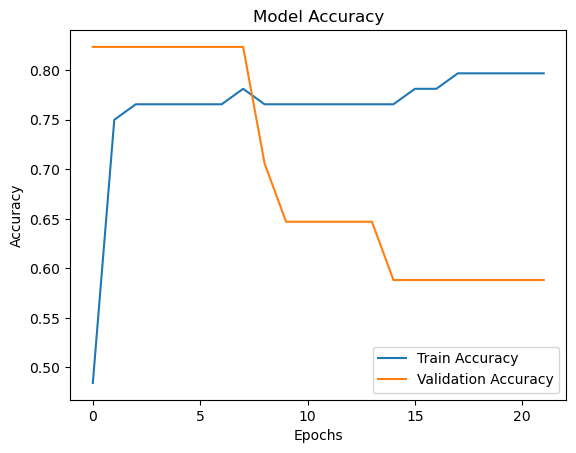

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pywt

# Step 1: Load and Preprocess Data
data = pd.read_csv("data.csv")
feature_columns = [col for col in data.columns if col not in ["Class", "UID", "Trial", "TrialSeq"]]
X = data[feature_columns].values
y = LabelEncoder().fit_transform(data["Class"])

# Step 2: Feature Extraction with GTST (Simulated as Wavelet Transform)
def gtst_transform(features):
    transformed_features = []
    for col in features.T:
        coeffs = pywt.wavedec(col, 'db4', level=3)
        transformed_features.append(np.hstack(coeffs))
    return np.array(transformed_features).T

X_transformed = gtst_transform(X)

# Ensure no missing values
X_transformed = np.nan_to_num(X_transformed)

# Step 3: Autoencoder for Dimensionality Reduction
input_dim = X_transformed.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(12, activation='relu')(encoded)  # Bottleneck Layer
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_transformed, X_transformed, epochs=50, batch_size=256, validation_split=0.2, shuffle=True)

encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X_transformed)

# Ensure X_encoded and y have the same number of rows
min_samples = min(X_encoded.shape[0], y.shape[0])
X_encoded = X_encoded[:min_samples]
y = y[:min_samples]

# Map selected features back to original feature names
selected_feature_names = feature_columns[:12]  # First 12 feature names (adjust if necessary)

# Save extracted features to CSV with correct labels
feature_df = pd.DataFrame(X_encoded, columns=selected_feature_names)
feature_df["Class"] = y  # Add target class
feature_df.to_csv("extracted_features_grad.csv", index=False)

# Step 4: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: DTGM-GCN Model
class DTGM_GCN(Model):
    def __init__(self, input_dim):
        super(DTGM_GCN, self).__init__()
        self.conv1 = layers.Conv1D(64, 3, activation='relu', padding='same')
        self.conv2 = layers.Conv1D(128, 3, activation='relu', padding='same')
        self.pool = layers.MaxPooling1D(pool_size=2)
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = tf.expand_dims(inputs, axis=2)  # Reshape for Conv1D
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.flatten(x)  # Apply flatten correctly
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)


model = DTGM_GCN(X_train.shape[1])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train Model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping, lr_scheduler])

# Step 7: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Step 8: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()